# Importing Libraries and Modules

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing
from sklearn.preprocessing import StandardScaler

#For Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [101]:
df=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\customer.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [14]:
df.shape

(7043, 21)

There are 7043 rows and 21 columns in the dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We see the are no null values but to confirm it we have to dig deeper. Also, we have to convert TotalCharges datatype into float. Churn is our Target variable.

In [17]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

We have 2 unique classes in our target variable

In [18]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We have 5174 values under No and 1869 values under Yes. Therefore the class is imbalanced, we will balance it later

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Can't find any outliers from the above table

# Univariate Analysis

In [102]:
#Preprocessing step done a bit early to find the analysis of TotalCharges

df['TotalCharges']=pd.to_numeric(df.TotalCharges,errors='coerce')

Converting TotalCharges into float data

In [30]:
df_numerical=df[['tenure','MonthlyCharges','TotalCharges']]

plotting distplot for only numerical columns

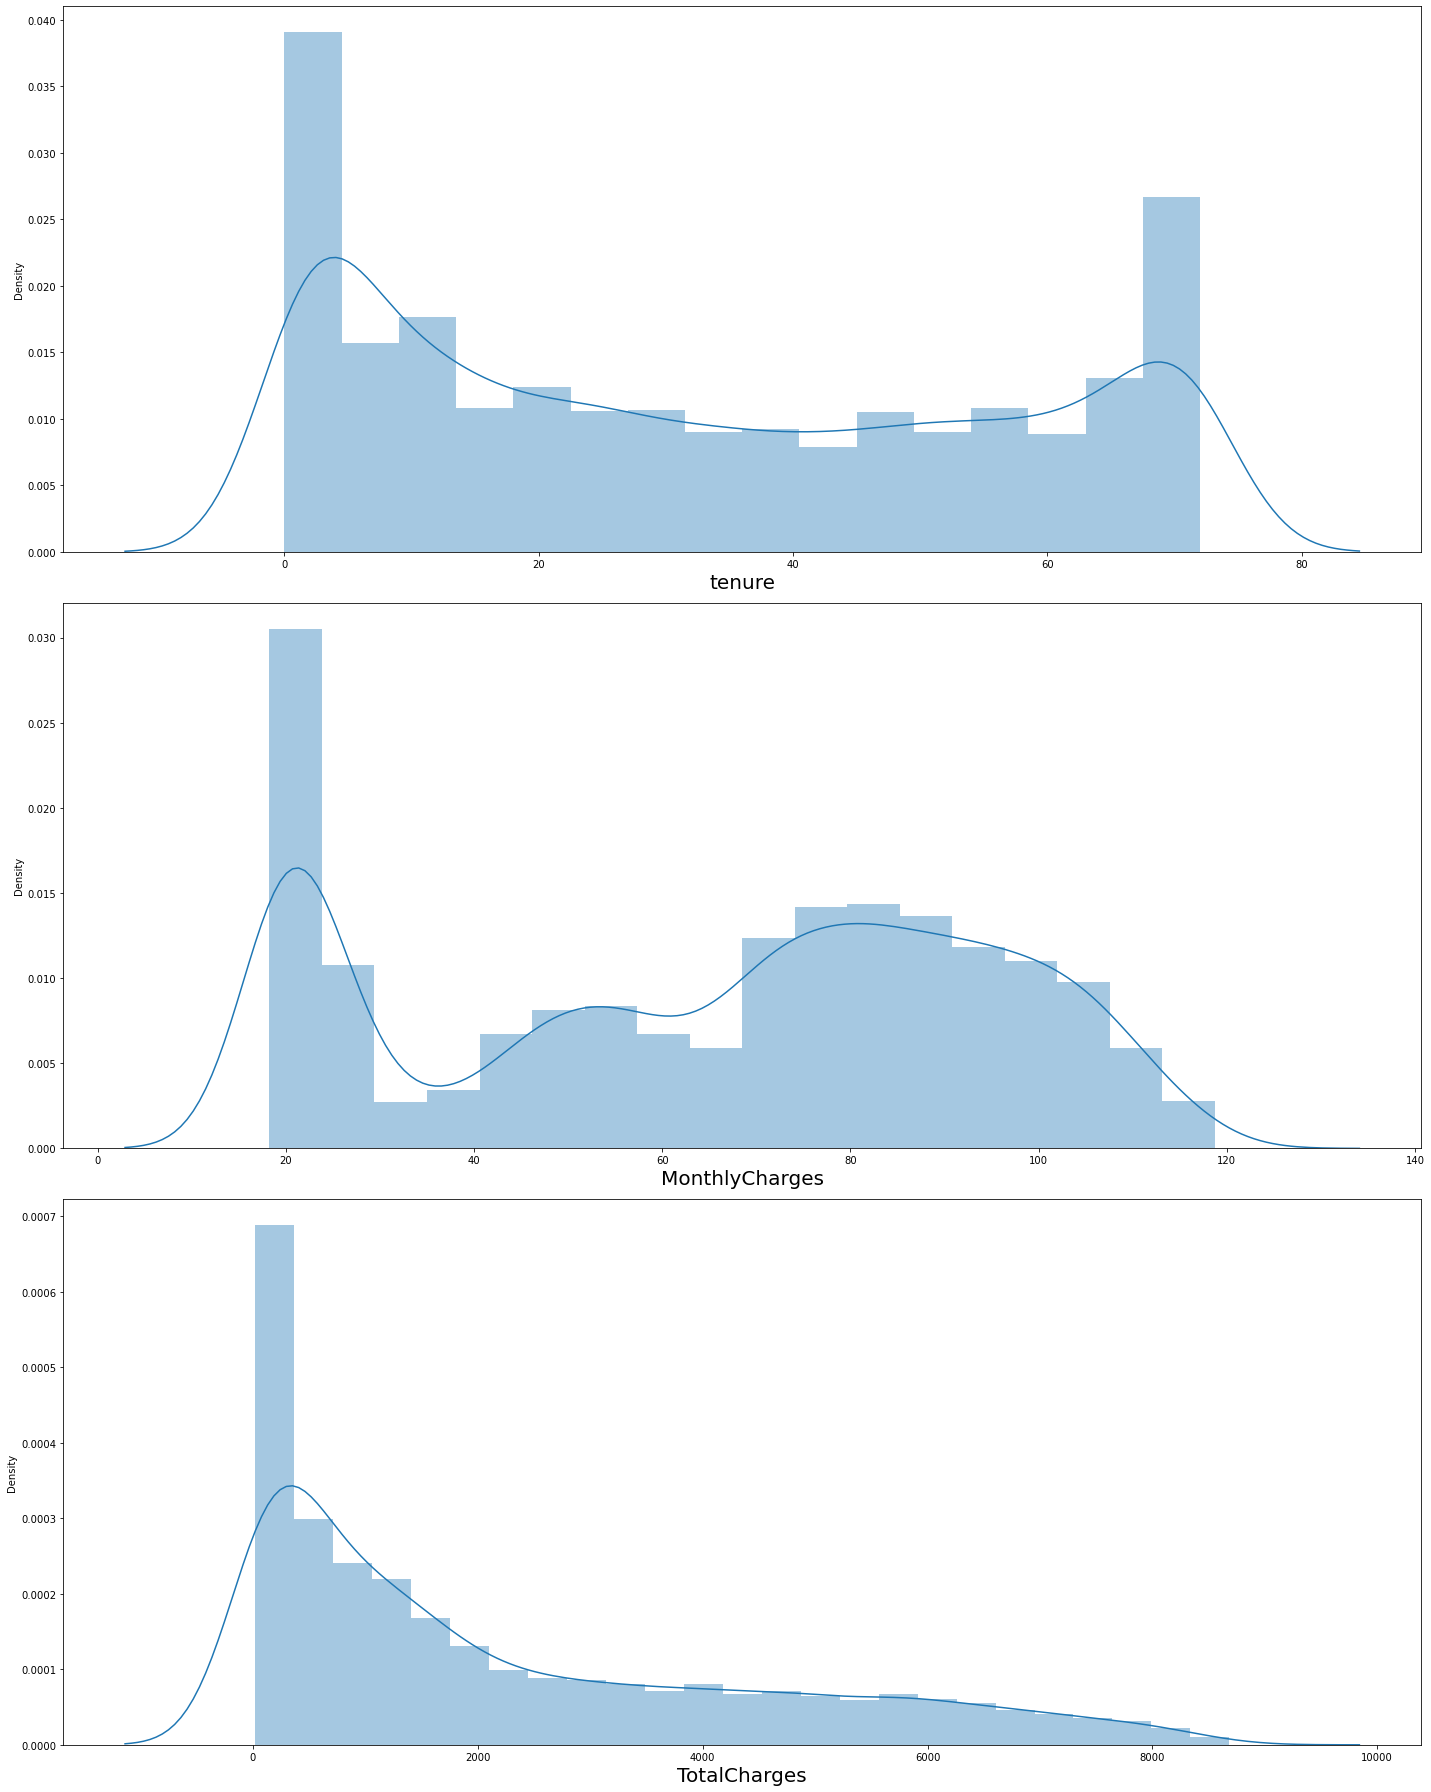

In [31]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df_numerical:
    if plotnumber<=3:
        ax=plt.subplot(3,1,plotnumber)
        sns.distplot(df_numerical[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

TotalCharges is right skewed while the rest are normally distributed

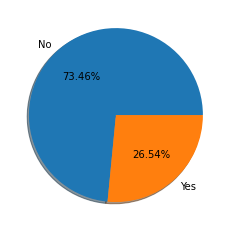

In [37]:
labels='No','Yes'

fig,ax=plt.subplots()
ax.pie(df['Churn'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)

plt.show()

73% customers retain while 27% customers move out

<AxesSubplot:xlabel='gender', ylabel='count'>

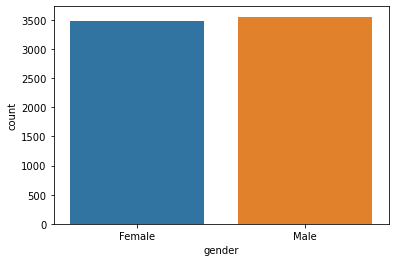

In [38]:
sns.countplot(df['gender'])

Majority of the customers are Male

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

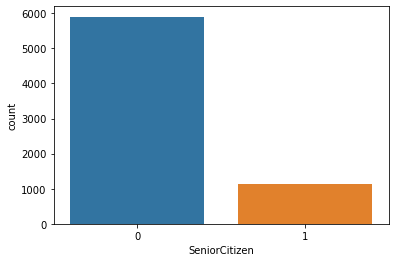

In [40]:
sns.countplot(df['SeniorCitizen'])

There are 5901 younger customersd while 1142 Senior Citizens

<AxesSubplot:xlabel='Partner', ylabel='count'>

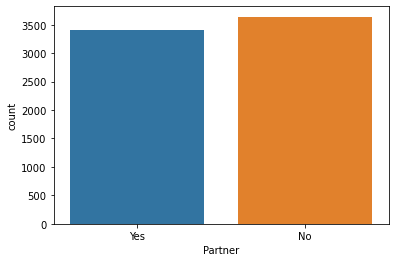

In [43]:
sns.countplot(df['Partner'])

3402 people have partners while 3641 dont have partners

<AxesSubplot:xlabel='Dependents', ylabel='count'>

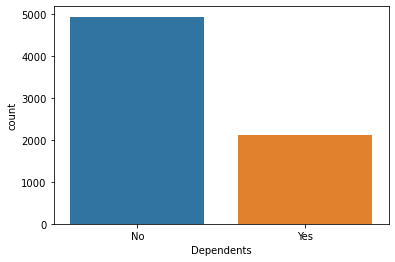

In [46]:
sns.countplot(df.Dependents)

2110 people are dependents while 4933 are not

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

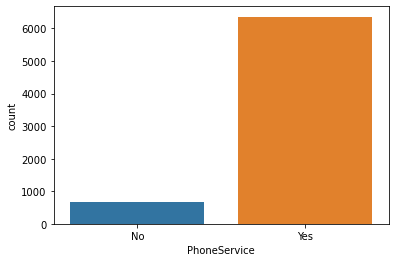

In [48]:
sns.countplot(df.PhoneService)

6361 people are using phone service while 682 are not using phone service

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

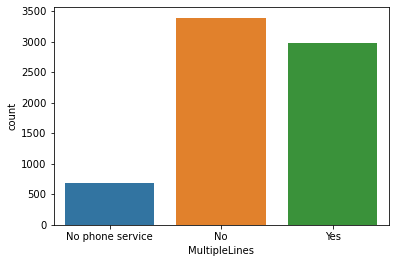

In [50]:
sns.countplot(df['MultipleLines'])

682 people are not using any phone service, 3390 people are not using multiple lines while 2971 people are using multiple lines

<AxesSubplot:xlabel='InternetService', ylabel='count'>

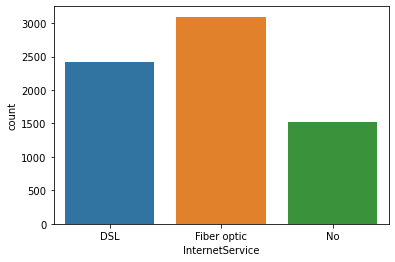

In [53]:
sns.countplot(df['InternetService'])

2421 people are using DSL service, 3096 people are using fibre optics while 1526 people are not using and internet service

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

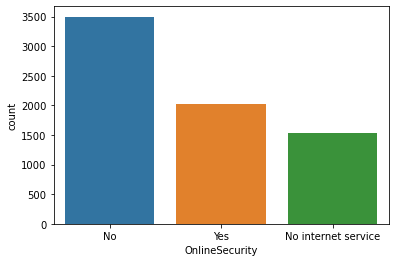

In [55]:
sns.countplot(df['OnlineSecurity'])

3498 people are not using any online security, 2019 people are using online security and 1526 are not using any internet service

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

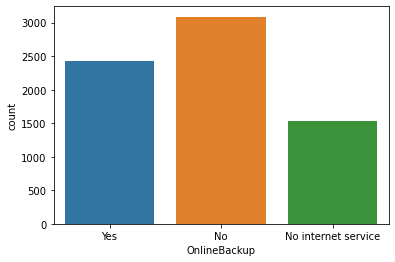

In [57]:
sns.countplot(df['OnlineBackup'])

3048 people dont use Online backup, 2429 people use online backup and 1526 people dont have any internet service

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

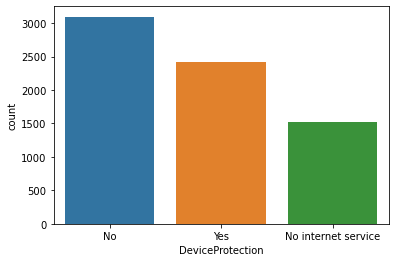

In [60]:
sns.countplot(df['DeviceProtection'])

3095 people dont use device protection, 2422 people use device protection while 1526 dont have any internet service

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

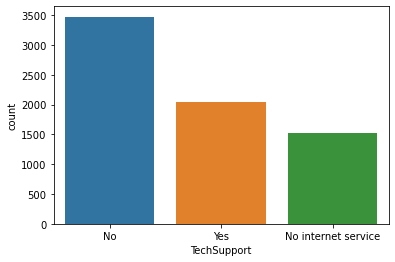

In [62]:
sns.countplot(df['TechSupport'])

3473 people dont use any tech support, 2044 people use and 1526 people dont have any internet service

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

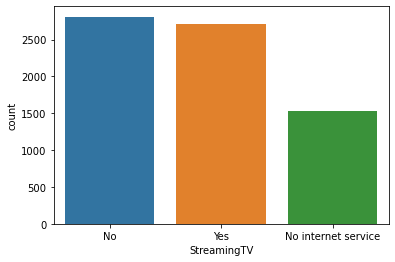

In [64]:
sns.countplot(df['StreamingTV'])

2810 dont stream TV, 23707 stream TV and 1526 have no internet service

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

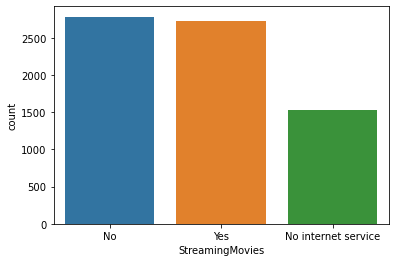

In [66]:
sns.countplot(df['StreamingMovies'])

2785 people dont stream movies, 2732 people stream movies and 1526 have no internet service

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

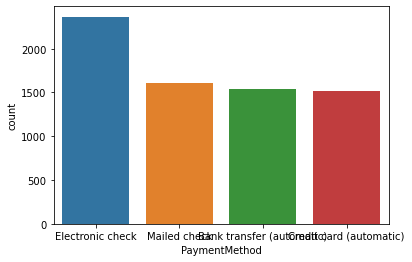

In [69]:
sns.countplot(df['PaymentMethod'])

2365 people pay through electronic check, 1612 pay through mailed check, 1544 pay through bank transfer and 1522 through credit card

# Bivariate Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

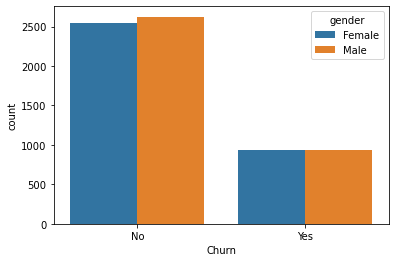

In [71]:
sns.countplot(x='Churn',hue='gender',data=df)

Male are more likely to retain than female customers

<AxesSubplot:xlabel='Churn', ylabel='count'>

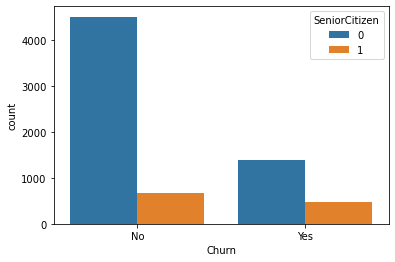

In [72]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=df)

Younger customers are more likely to exit the business

<AxesSubplot:xlabel='Churn', ylabel='count'>

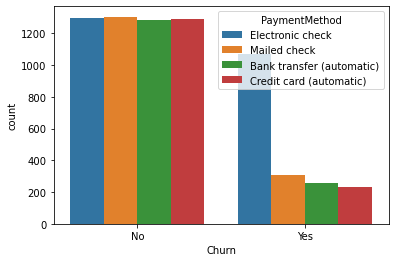

In [73]:
sns.countplot(x='Churn',hue='PaymentMethod',data=df)

Customers paying through mailed check are more likey to retain whereas customers paying through electronic check are more likely to exit

<AxesSubplot:xlabel='Churn', ylabel='count'>

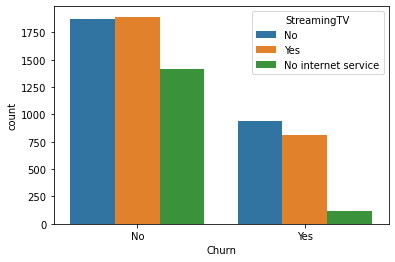

In [75]:
sns.countplot(x='Churn',hue='StreamingTV',data=df)

People who dont stream TV are more likely to exit while people who stream are more likely to retain

<AxesSubplot:xlabel='Churn', ylabel='count'>

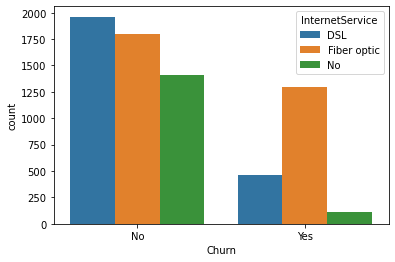

In [79]:
sns.countplot(x='Churn',hue='InternetService',data=df)

People who have DSL are more likely to retain whereas people who have fibre optics are more likely to exit

# Preprocessing

In [103]:
df.drop(columns=['customerID'],axis=1,inplace=True)

Dropping customerID since it gives no meaning to the data

In [104]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

Replaced the null values with the mean

In [105]:
#Converting strings into numberical format

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df1=lab_enc.fit_transform(df['gender'])
df2=lab_enc.fit_transform(df['Partner'])
df3=lab_enc.fit_transform(df['Dependents'])
df4=lab_enc.fit_transform(df['PhoneService'])
df5=lab_enc.fit_transform(df['MultipleLines'])
df6=lab_enc.fit_transform(df['InternetService'])
df7=lab_enc.fit_transform(df['OnlineSecurity'])
df8=lab_enc.fit_transform(df['OnlineBackup'])
df9=lab_enc.fit_transform(df['DeviceProtection'])
df10=lab_enc.fit_transform(df['TechSupport'])
df11=lab_enc.fit_transform(df['StreamingTV'])
df12=lab_enc.fit_transform(df['StreamingMovies'])
df13=lab_enc.fit_transform(df['Contract'])
df14=lab_enc.fit_transform(df['PaperlessBilling'])
df15=lab_enc.fit_transform(df['PaymentMethod'])
df16=lab_enc.fit_transform(df['Churn'])





df['gender']=df1
df['Partner']=df2
df['Dependents']=df3
df['PhoneService']=df4
df['MultipleLines']=df5
df['InternetService']=df6
df['OnlineSecurity']=df7
df['OnlineBackup']=df8
df['DeviceProtection']=df9
df['TechSupport']=df10
df['StreamingTV']=df11
df['StreamingMovies']=df12
df['Contract']=df13
df['PaperlessBilling']=df14
df['PaymentMethod']=df15
df['Churn']=df16

Converted all Strings in to number format

# Multivariate Analysis

In [58]:
#finding out correlation between the features
corr=df.corr()
corr.shape

(20, 20)

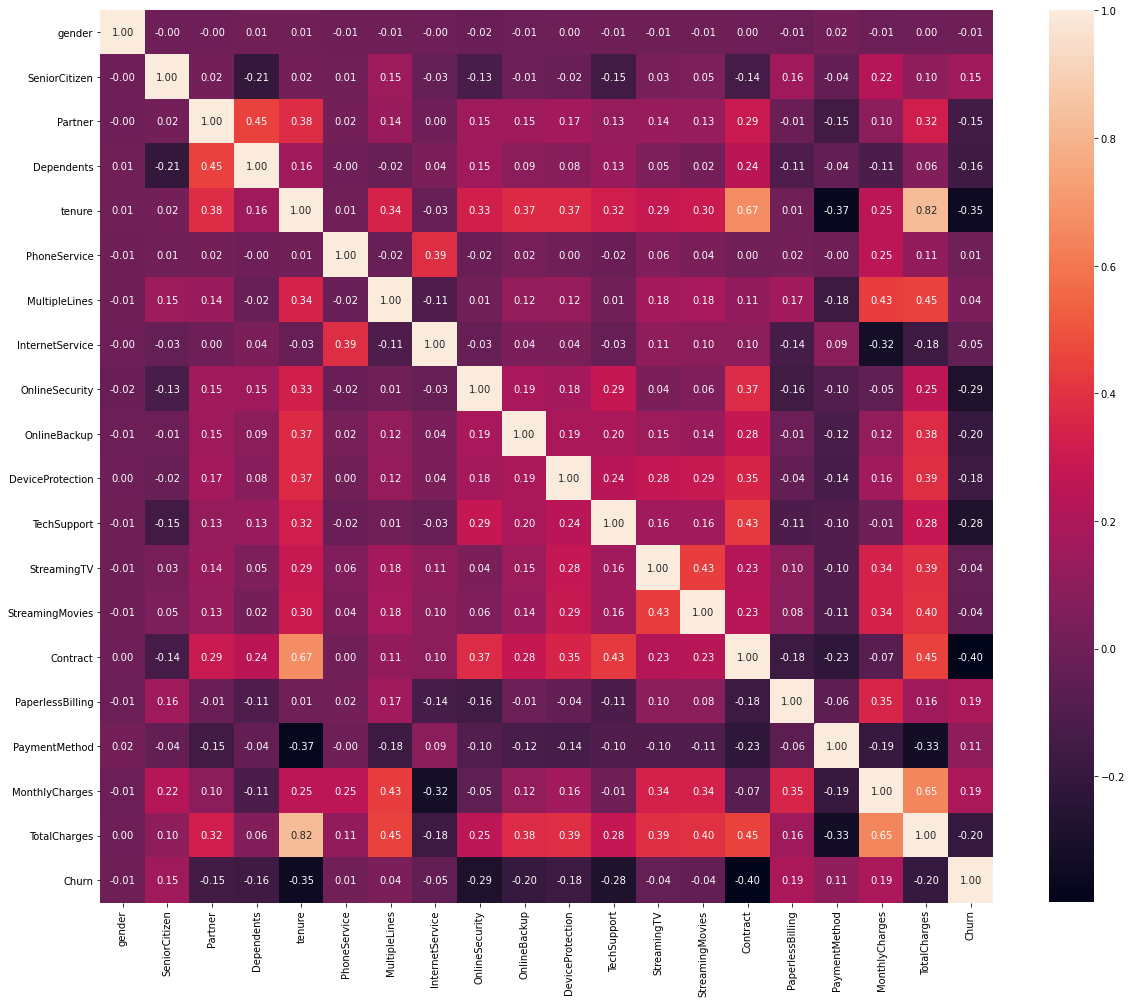

In [60]:
#plotting the heatmap of correlation between features

plt.figure(figsize=(20,20))

sns.heatmap(corr,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

We see TotalCharges and Tenure are correlated. We will confirm it with scatterplot and by vif later.

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

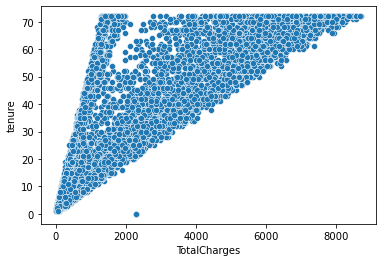

In [63]:
sns.scatterplot(df.TotalCharges,df.tenure)

Confirmed they are correlated

## Finding Outliers

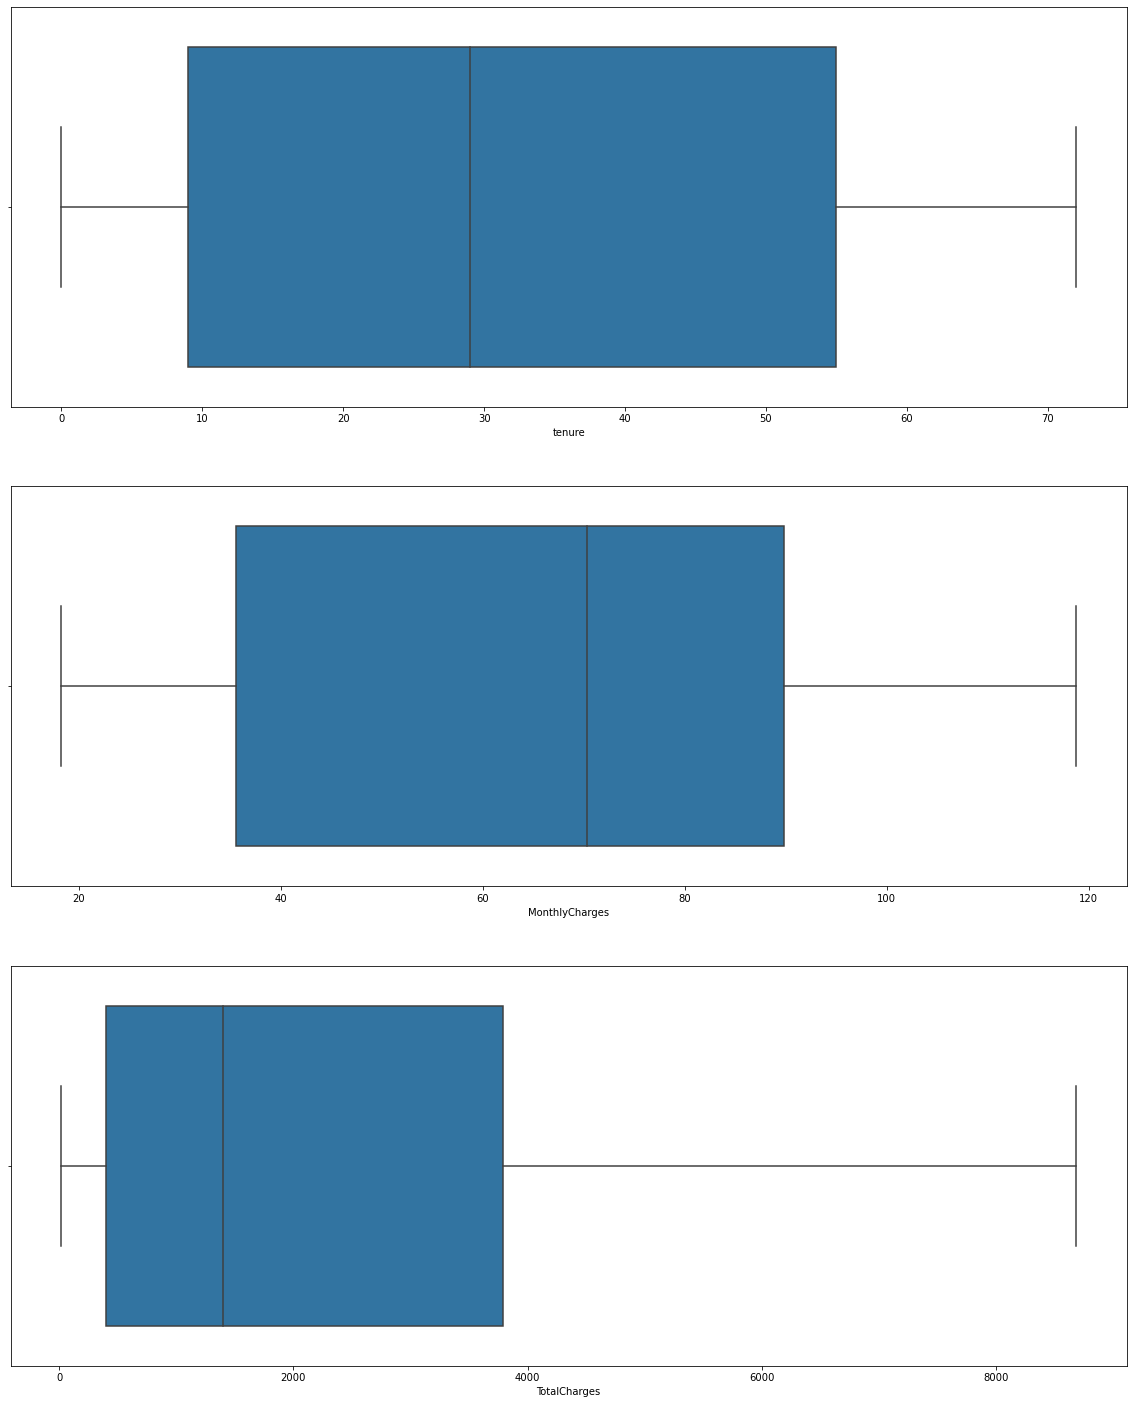

In [66]:
plt.figure(figsize=(20,25))
graph=1

for column in df_numerical:
    if(graph<=3):
        ax=plt.subplot(3,1,graph)
        sns.boxplot(df_numerical[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

We see there are no outliers

## Removing Skewness

In [106]:
df_numerical.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [107]:
df['TotalCharges'] = np.sqrt(df['TotalCharges'])

In [108]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.307849
Churn               1.063031
dtype: float64

We have removed the skewness from TotalCharges

## Separating columns into features and target

In [109]:
X=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

We have splitted the data into features and labels

In [110]:
#Balancing the class

from imblearn.over_sampling import SMOTE
SM=SMOTE()
X,y=SM.fit_resample(X,y)

y.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

We have balanced out target variable

In [111]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.017548,gender
1,1.094812,SeniorCitizen
2,1.546248,Partner
3,1.428650,Dependents
4,15.812617,tenure
5,1.702372,PhoneService
6,1.412183,MultipleLines
7,1.752353,InternetService
8,1.357359,OnlineSecurity
9,1.269633,OnlineBackup


Like analysed earlier, tenure and TotalCharges are correlated. We will drop tenure.

In [112]:
X=X.drop(columns=['tenure'],axis=1)

In [113]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.017543,gender
1,1.094765,SeniorCitizen
2,1.541064,Partner
3,1.426791,Dependents
4,1.701438,PhoneService
5,1.411774,MultipleLines
6,1.725006,InternetService
7,1.353287,OnlineSecurity
8,1.269580,OnlineBackup
9,1.346256,DeviceProtection


No collinearity issue now

# Model Training

## Finding the best random state

In [114]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.8078855817549285 on Random State 2


In [116]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=2)

Splitting dataset into train set and test set

### Checking accuracy by using different models

In [133]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
pred=DTC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1283
           1       0.79      0.82      0.80      1304

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



The accuracy for Decision Tree Classifier is 80%

In [134]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
pred=RFC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1283
           1       0.84      0.85      0.85      1304

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



The accuracy for Random Forest Classifier is 85%

In [135]:
SV=SVC()
SV.fit(X_train,Y_train)
pred=SV.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1283
           1       0.82      0.83      0.82      1304

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587



The accuracy for Support Vector Classifier is 82%

In [136]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1283
           1       0.79      0.81      0.80      1304

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



The accuracy for Logistic Regression is 80%

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred=gbc.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1283
           1       0.81      0.85      0.83      1304

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587



The accuracy for Gradient Boosting Classifier is 82%

## Cross validation

In [139]:
from sklearn.model_selection import cross_val_score

In [140]:
print(cross_val_score(DTC,X_scaler,y,cv=5).mean())

0.7861517734768833


In [141]:
print(cross_val_score(RFC,X_scaler,y,cv=5).mean())

0.8351472274173852


In [142]:
print(cross_val_score(SV,X_scaler,y,cv=5).mean())

0.8023855254586337


In [143]:
print(cross_val_score(lr,X_scaler,y,cv=5).mean())

0.7851804998097053


In [154]:
print(cross_val_score(gbc,X_scaler,y,cv=5).mean())

0.8106961985416185


The difference between Accuracy and Cross validation is the least in RFC, DTC, LR and GBC but F1 score is the highest for RFC, so RFC is our best model

# Hyperparameter Tuning

In [117]:
parameters={'n_estimators':[200,700],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini', 'entropy'],
           'max_depth':[4,5,6,7,8]}

In [118]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [119]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [120]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [121]:
Final_model=RandomForestClassifier(n_estimators=200,max_features='log2',criterion='entropy',max_depth=8)
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 82.10282180131426


The accuracy after hyperparameter tuning is 82%, earlier it was 85% due to overfitting of the model

# Plotting AUC ROC curve

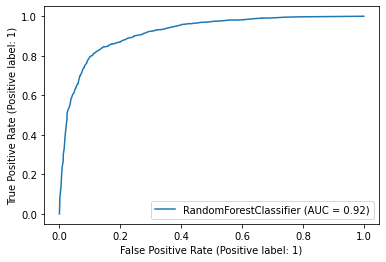

In [150]:
plot_roc_curve(RFC,x_test,y_test)
plt.show()

The AUC score is 0.92

# Confusion Matrix

In [151]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [152]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1070,  213],
       [ 185, 1119]], dtype=int64)

In [122]:
(185+213)/(1070+213+185+1119)*100

15.384615384615385

Our model has predicted 15% false numbers

# Saving the model

In [123]:
import joblib
joblib.dump(Final_model,"FinalModelCustomerChurn.pkl")

['FinalModelCustomerChurn.pkl']